In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
data= pd.read_csv('OnlineNewsPopularity.csv')
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


### 1. Expolatory Data Analysis (EDA)

In [3]:
data['url'][2000]

'http://mashable.com/2013/02/10/wedding-proposal-videos/'

In [4]:
import nltk
import re
import string
from datetime import datetime

In [5]:
date=[]
date_original=[]

for i in range(data.shape[0]):
    x=re.findall(r'[0-9]{4}/[0-9]{2}/[0-9]{2}',data['url'][i])
    date.append(x)
    
for i in date:
    for r in i:
        date_original.append(r)

In [6]:
data['date']=date_original

In [7]:
data['date']= pd.to_datetime(data['date'])

C:\Users\ACER M5\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


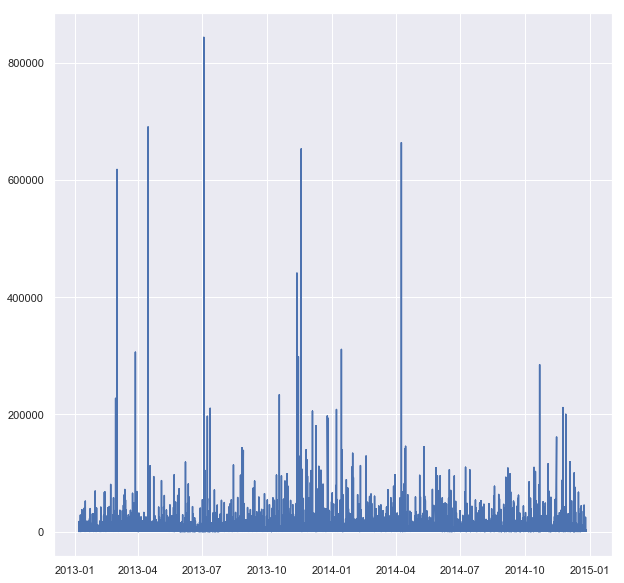

In [8]:
fig=plt.figure(figsize=(10,10))
ax=fig.gca()
plt.plot(data['date'],data[' shares'])
plt.show()

In [17]:
data['date'][5].dayofweek

0

In [9]:
data.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 62 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [11]:
data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

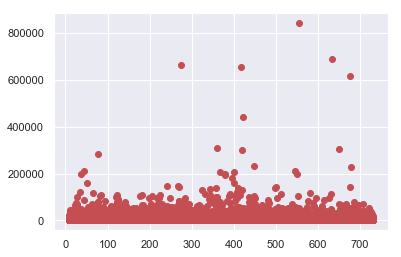

In [12]:
plt.scatter(data[' timedelta'],data[' shares'],c='r')


### Observations:

1) Time Delta (The days between the dataset compilation and article publishing) v Number of shares

2) There are more outliers such as after 400 days more articles have been shared more than 20k times

3) These outliers are not helping to check the exact distribution of data and are skewing the results

In [13]:
data.shape[0]

39644

In [14]:
for i in range(data.shape[0]):
    if data[' shares'][i] > 28000:
        data.drop(index=i,inplace=True)
        

In [15]:
data=data.reset_index(drop=True)

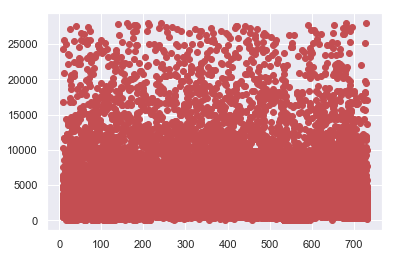

In [16]:
plt.scatter(data[' timedelta'],data[' shares'],c='r')

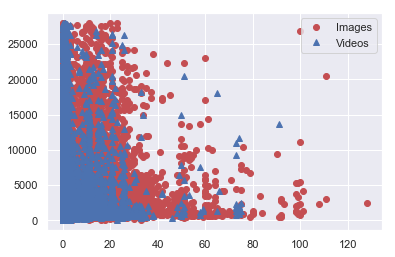

In [17]:
plt.plot(data[' num_imgs'],data[' shares'],'ro',label='Images')
plt.plot(data[' num_videos'],data[' shares'],'b^',label='Videos')
plt.legend()

### This was for getting the relation between number of videos and images in an article with their corresponding shares.

1) If number of videos and images exceeds 80 then shares come close to 0-5k.

2) Most of the articles between 0-40 images and videos has been shared 0-20k times

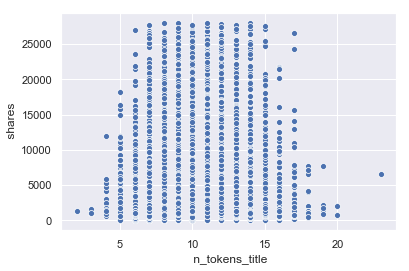

In [18]:
sns.scatterplot(data[' n_tokens_title'],data[' shares'])

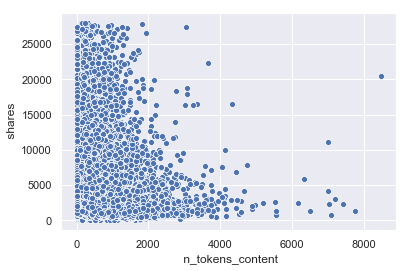

In [19]:
sns.scatterplot(data[' n_tokens_content'],data[' shares'])

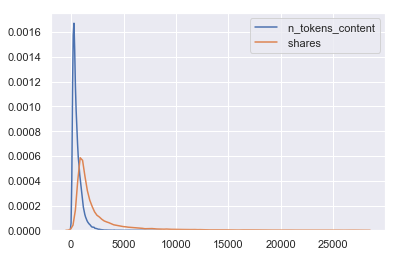

In [20]:
sns.kdeplot(data[' n_tokens_content'])
sns.kdeplot(data[' shares'])

## Observations:

1) Too short and too long titles are not getting good response. Words between 5-18 are good.

2) Total words between 0-20k are getting the higher response.Above 20k articles have not been shared more than 500 times.

3) Both "shares" and "n_number_tokens" are right skewed.That means data is concentrated in lower half.

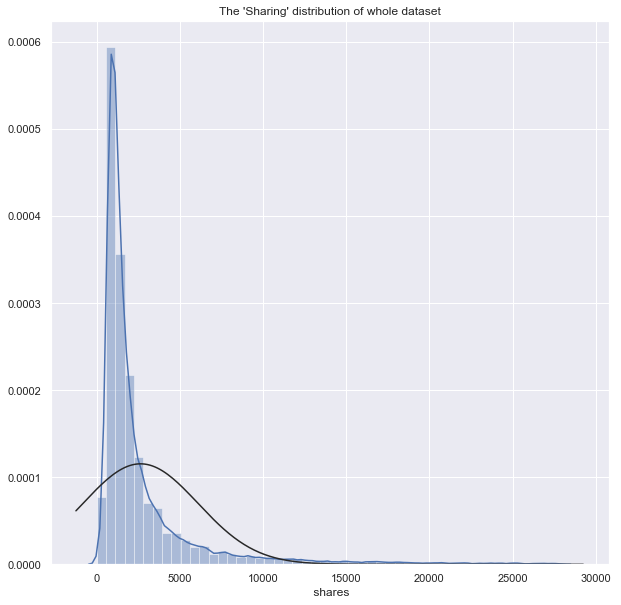

In [21]:
from scipy.stats import norm
fig= plt.figure(figsize=(10,10))
ax=fig.gca()
ax.set_title("The 'Sharing' distribution of whole dataset")
sns.distplot(data[' shares'],ax=ax, fit=norm)

In [22]:
print("Skew:",data[' shares'].skew())

Skew: 3.6009669969582965


A Positive Skew means that data is right skewed and it can be corrected with log or square root.

#### 1. it is positive skewed so more data in lower half.
#### 2. We cannot use squared error term as it would highlight the higher terms with errors so would make results less interpretable.
#### 3. We can power transform the target variable or leave it as it is.

In [23]:
##data[' shares']= np.log(data[' shares'])

In [24]:
##fig= plt.figure(figsize=(10,10))
##ax=fig.gca()
##ax.set_title("The 'Sharing' distribution of whole dataset")
##sns.distplot(data[' shares'],ax=ax, fit=norm)
##print("Skew:",data[' shares'].skew())

In [25]:
lifestyle_articles=data[data[' data_channel_is_lifestyle'] == 1][' shares'].sum()
entertainment_articles=data[data[' data_channel_is_entertainment'] == 1][' shares'].sum()
business_articles=data[data[' data_channel_is_bus'] == 1][' shares'].sum()
socialmedia_articles=data[data[' data_channel_is_socmed'] == 1][' shares'].sum()
technical_articles=data[data[' data_channel_is_tech'] == 1][' shares'].sum()
world_articles=data[data[' data_channel_is_world'] == 1][' shares'].sum()

<BarContainer object of 6 artists>

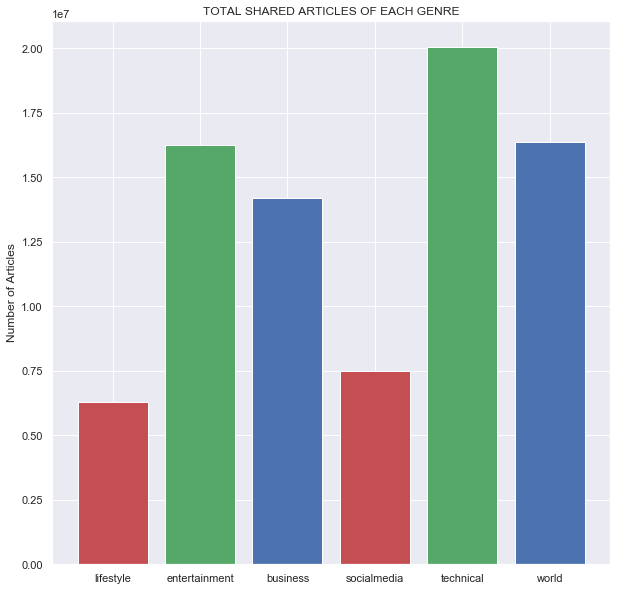

In [26]:
articles_types=np.array([lifestyle_articles,entertainment_articles,business_articles,socialmedia_articles,technical_articles,world_articles],dtype=np.int64)
fig= plt.figure(figsize=(10,10))
ax=fig.gca()
ax.set_title('TOTAL SHARED ARTICLES OF EACH GENRE')
ax.set_ylabel('Number of Articles')
plt.bar(x=['lifestyle','entertainment','business','socialmedia','technical','world'],height=articles_types,color='rgb')


In [27]:
articles_types

array([ 6272279, 16238428, 14180070,  7481357, 20069193, 16379535],
      dtype=int64)

### Observations:

1) World articles are the highest ones in sharing order.

2) lifestyle articles are shared the least.

In [28]:
monday_articles=data[data[' weekday_is_monday'] == 1][' shares'].sum()
tuesday_articles=data[data[' weekday_is_tuesday'] == 1][' shares'].sum()
wednesday_articles=data[data[' weekday_is_wednesday'] == 1][' shares'].sum()
thursday_articles=data[data[' weekday_is_thursday'] == 1][' shares'].sum()
friday_articles=data[data[' weekday_is_friday'] == 1][' shares'].sum()
saturday_articles=data[data[' weekday_is_saturday'] == 1][' shares'].sum()
sunday_articles=data[data[' weekday_is_sunday'] == 1][' shares'].sum()
weekend_articles=data[data[' is_weekend'] == 1][' shares'].sum()

<BarContainer object of 8 artists>

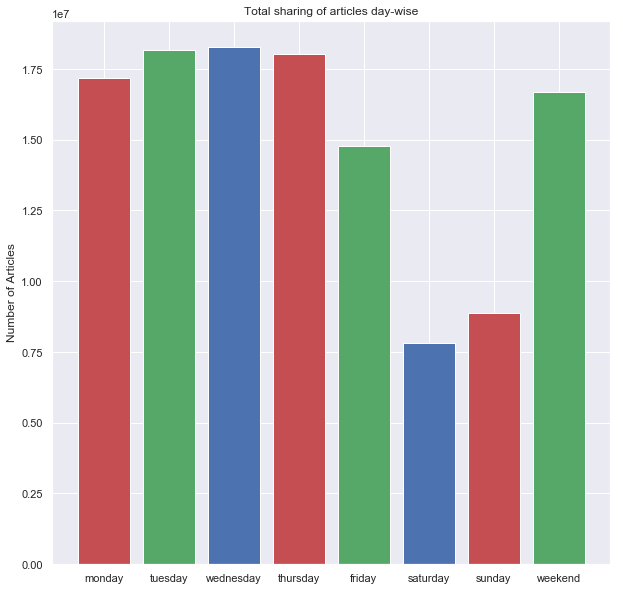

In [29]:
articles_publishing_days= np.array([monday_articles,tuesday_articles,wednesday_articles,thursday_articles,friday_articles,
                                    saturday_articles,sunday_articles,weekend_articles])
fig= plt.figure(figsize=(10,10))
ax=fig.gca()
ax.set_title('Total sharing of articles day-wise')
ax.set_ylabel('Number of Articles')
plt.bar(x=['monday','tuesday','wednesday','thursday','friday','saturday','sunday','weekend'],height=articles_publishing_days
        ,color='rgb')


In [30]:
result=[]
days=[' weekday_is_monday',' weekday_is_tuesday',' weekday_is_wednesday',' weekday_is_thursday',' weekday_is_friday',
     ' weekday_is_saturday',' weekday_is_sunday',' is_weekend']
genre=[' data_channel_is_lifestyle',' data_channel_is_entertainment',' data_channel_is_bus',' data_channel_is_socmed',
       ' data_channel_is_tech',' data_channel_is_world']
for i in days:
    list1=[]
    for j in genre:
        list1.append(data.groupby([i,j])[' shares'].sum()[1][1])
    print('Best channel on {} has articles {} and channel is {}'.format(i,max(list1),genre[list1.index(max(list1))]))

Best channel on  weekday_is_monday has articles 3230332 and channel is  data_channel_is_tech
Best channel on  weekday_is_tuesday has articles 3883646 and channel is  data_channel_is_tech
Best channel on  weekday_is_wednesday has articles 3807165 and channel is  data_channel_is_tech
Best channel on  weekday_is_thursday has articles 3328651 and channel is  data_channel_is_tech
Best channel on  weekday_is_friday has articles 2607854 and channel is  data_channel_is_tech
Best channel on  weekday_is_saturday has articles 1764513 and channel is  data_channel_is_tech
Best channel on  weekday_is_sunday has articles 1770970 and channel is  data_channel_is_entertainment
Best channel on  is_weekend has articles 3211545 and channel is  data_channel_is_tech


In [31]:
Worst_min_shares=pd.DataFrame(data.groupby([' kw_min_min'],sort=True)[' shares'].sum())
Worst_max_shares=pd.DataFrame(data.groupby([' kw_max_min'],sort=True)[' shares'].sum())
Worst_avg_shares=pd.DataFrame(data.groupby([' kw_avg_min'],sort=True)[' shares'].sum())
Best_min_shares=pd.DataFrame(data.groupby([' kw_min_max'],sort=True)[' shares'].sum())
Best_max_shares=pd.DataFrame(data.groupby([' kw_max_max'],sort=True)[' shares'].sum())
Best_avg_shares=pd.DataFrame(data.groupby([' kw_avg_max'],sort=True)[' shares'].sum())
Normal_min_shares=pd.DataFrame(data.groupby([' kw_min_avg'],sort=True)[' shares'].sum())
Normal_max_shares=pd.DataFrame(data.groupby([' kw_max_avg'],sort=True)[' shares'].sum())
Normal_avg_shares=pd.DataFrame(data.groupby([' kw_avg_avg'],sort=True)[' shares'].sum())

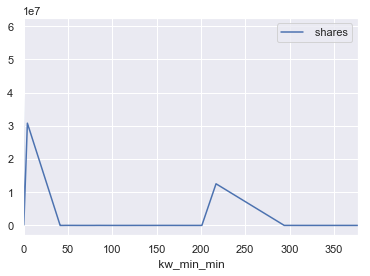

In [32]:
Worst_min_shares.plot()

In [33]:
Lda_00=pd.DataFrame(data.groupby(by=[' LDA_00'])[' shares'].sum().sort_values(ascending=False)).reset_index()
Lda_01=pd.DataFrame(data.groupby(by=[' LDA_01'])[' shares'].sum().sort_values(ascending=False)).reset_index()
Lda_02=pd.DataFrame(data.groupby(by=[' LDA_02'])[' shares'].sum().sort_values(ascending=False)).reset_index()
Lda_03=pd.DataFrame(data.groupby(by=[' LDA_03'])[' shares'].sum().sort_values(ascending=False)).reset_index()
Lda_04=pd.DataFrame(data.groupby(by=[' LDA_04'])[' shares'].sum().sort_values(ascending=False)).reset_index()



In [34]:
## mean respective lda for > 50 shares
mean_lda_00=np.mean(Lda_00[Lda_00[' shares'] > 50])[0]
mean_lda_01=np.mean(Lda_01[Lda_01[' shares'] > 50])[0]
mean_lda_02=np.mean(Lda_02[Lda_02[' shares'] > 50])[0]
mean_lda_03=np.mean(Lda_03[Lda_03[' shares'] > 50])[0]
mean_lda_04=np.mean(Lda_04[Lda_04[' shares'] > 50])[0]

<BarContainer object of 5 artists>

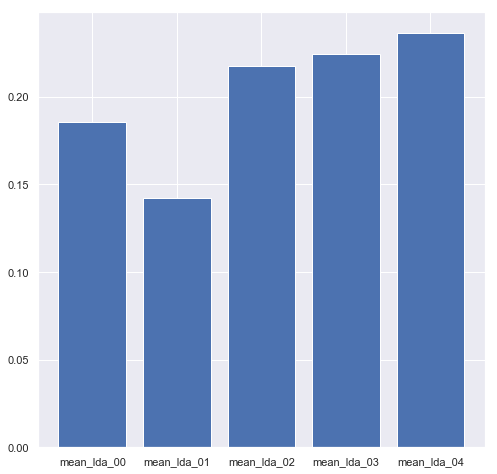

In [35]:
fig=plt.figure(figsize=(8,8))
ax=fig.gca()
plt.bar(x=['mean_lda_00','mean_lda_01','mean_lda_02','mean_lda_03','mean_lda_04'],
        height=[mean_lda_00,mean_lda_01,mean_lda_02,mean_lda_03,mean_lda_04])

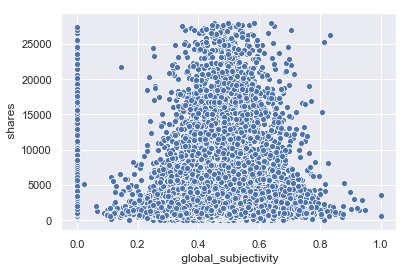

In [36]:
sns.scatterplot(x=data[' global_subjectivity'],y=data[' shares']) # Subjectivity from 0.0-1.0

In [37]:
columns_group_3=[' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' rate_positive_words',
       ' rate_negative_words', ' avg_positive_polarity',
       ' min_positive_polarity', ' max_positive_polarity',
       ' avg_negative_polarity', ' min_negative_polarity',
       ' max_negative_polarity', ' title_subjectivity',
       ' title_sentiment_polarity', ' abs_title_subjectivity',
       ' abs_title_sentiment_polarity', ' shares']

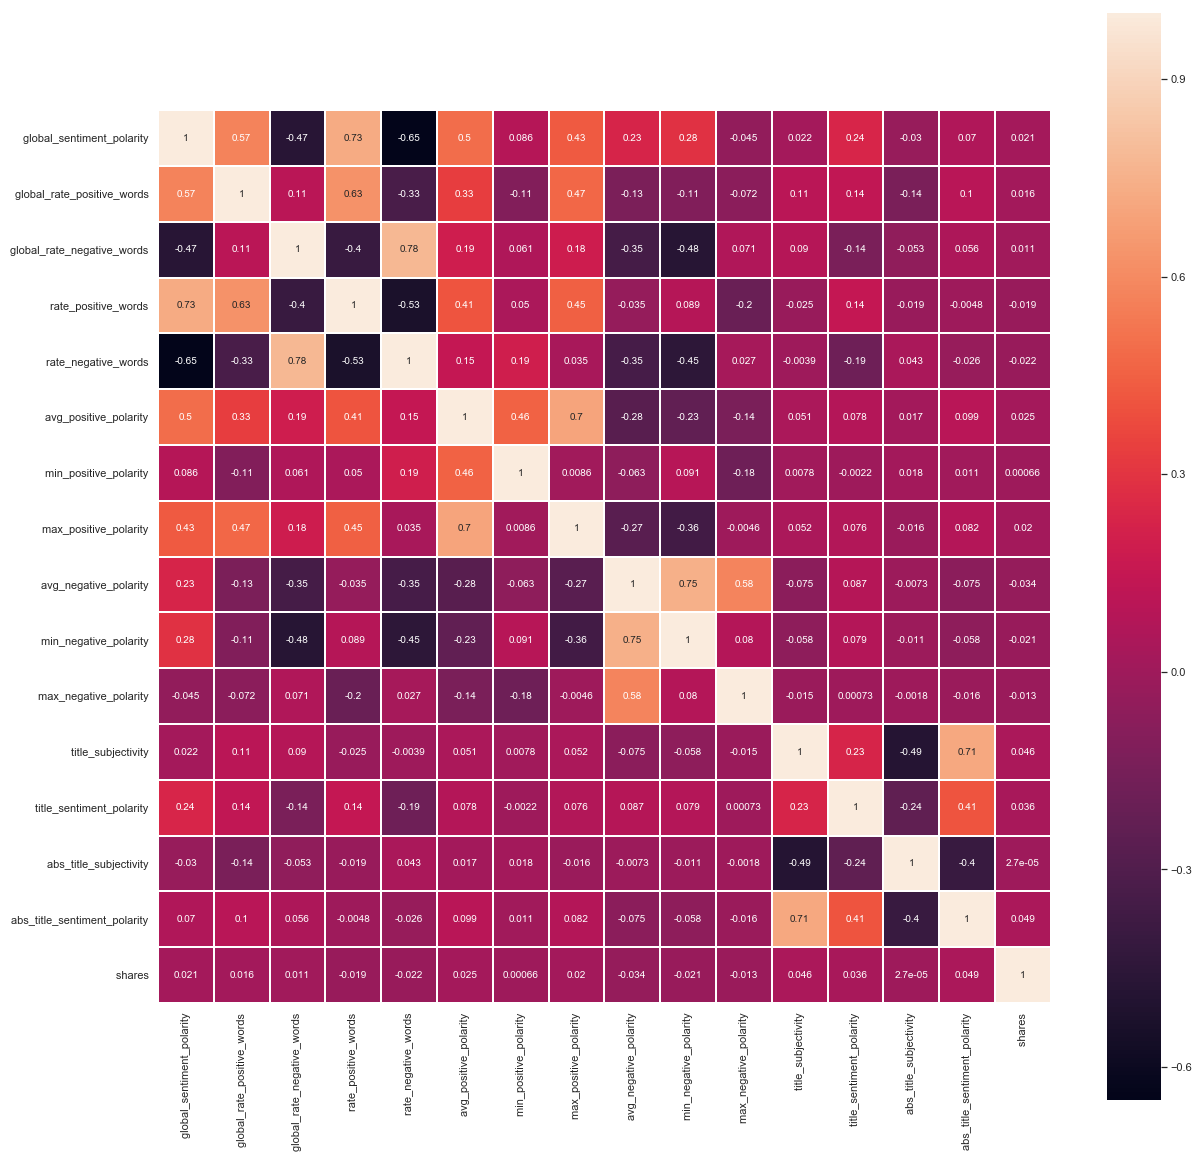

In [38]:
fig, ax = plt.subplots(figsize=(20,20))

sns.heatmap(data[columns_group_3].corr(),linewidth=1.0,ax=ax,square=True,annot=True)

### 2. Principal Component Analysis

In [39]:
from sklearn.decomposition import PCA

In [40]:
y= data[' shares']

In [41]:
pca_data=data.drop(labels=['url',' shares','date'],axis=1)

In [42]:
pca_data.head()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,...,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,...,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,...,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,...,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,...,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364


In [43]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
data_transformed= scaler.fit_transform(pca_data)

In [44]:
pca=PCA()
principal_comp=pd.DataFrame(pca.fit_transform(pca_data))

In [45]:
principal_comp.head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,791021.495431,83404.305658,-4678.168676,-5776.270379,-144.076118,-4092.341275,-102.275303,650.736809,1038.849780,936.544594,...,0.005491,-0.009271,0.005382,0.052455,0.011097,-0.002560,-0.003052,-4.487488e-07,2.549650e-10,-2.094564e-10
1,791031.717685,83378.123283,-4483.142243,-6536.584976,-491.641366,-4081.641056,-117.560039,647.114347,1038.175264,952.836909,...,-0.040361,-0.007435,-0.004695,-0.016577,0.024048,0.002821,0.002272,-1.313122e-06,3.930448e-11,5.314719e-11
2,791012.797033,83426.566435,-4844.084574,-5129.380620,151.599427,-4101.483712,-89.155679,653.873676,1039.316305,933.230955,...,-0.050266,0.037994,0.067029,-0.045597,-0.040833,-0.015745,0.000572,6.488661e-07,-4.160343e-11,8.478008e-12
3,791031.702526,83377.935742,-4482.973401,-6536.472238,-492.072895,-4082.110141,-116.145104,647.777587,1036.835804,1081.576060,...,0.031495,0.020979,-0.029307,-0.020405,0.002897,0.005661,0.000900,6.731578e-07,-4.843095e-11,1.403709e-11
4,790836.088810,83897.886679,-8235.468719,7996.887885,-6443.340052,-4532.560234,2124.075318,724.081334,1037.112774,1321.347730,...,-0.064586,0.010790,0.042097,-0.015292,0.000365,0.013418,-0.004283,-6.134374e-07,-2.303011e-11,1.867053e-12


In [46]:
pca.explained_variance_ratio_

array([7.63976554e-01, 1.63195754e-01, 3.52492986e-02, 3.17219496e-02,
       4.84094167e-03, 6.01627888e-04, 2.77247942e-04, 1.12639413e-04,
       1.67201215e-05, 3.46046463e-06, 2.90853352e-06, 5.28805716e-07,
       3.47409938e-07, 1.79607444e-08, 1.46381115e-09, 7.59014860e-10,
       7.15471984e-10, 2.16898393e-10, 1.59100963e-10, 5.90130965e-11,
       3.75327159e-11, 9.35781288e-12, 3.59951878e-12, 3.15248023e-12,
       2.73366160e-12, 2.65784910e-12, 2.63119067e-12, 2.60477714e-12,
       2.42879948e-12, 2.16956337e-12, 2.11278768e-12, 1.19290115e-12,
       1.02603041e-12, 9.27831512e-13, 8.52270783e-13, 7.96517257e-13,
       7.72828491e-13, 6.49858477e-13, 3.80464247e-13, 3.66363498e-13,
       3.44065381e-13, 3.24521033e-13, 2.71216098e-13, 2.30916328e-13,
       1.49117430e-13, 1.12166411e-13, 8.07278714e-14, 6.68598282e-14,
       6.29388154e-14, 3.26726283e-14, 2.16222079e-14, 1.79645290e-14,
       1.20365051e-14, 6.66033423e-15, 1.89505378e-15, 2.20213457e-16,
      

### 3. Model Selection:

### 1.Random Forest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV

In [141]:
test_size=0.2
X_train, X_test, y_train, y_test = train_test_split(pca_data, y,  
    test_size=test_size,random_state=23)

In [51]:

param_grid= {'n_estimators':[20,40],
            'max_depth':[10,20],
             'max_features':['auto',10,20],
             'bootstrap':[True,False],             
            }

## Initial result gave both extreme values as best parameters so run again by increasing limit

In [51]:
random_search= RandomizedSearchCV(RandomForestRegressor(),param_distributions=param_grid,
                                  cv=5,scoring='neg_mean_absolute_error',
                         verbose=1,n_jobs=-1)
randomsearch_result=random_search.fit(X_train,y_train)
best_paramters= randomsearch_result.best_params_

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:  3.4min finished


In [52]:
pd.DataFrame(randomsearch_result.cv_results_).sort_values('mean_test_score',ascending=False)

C:\Users\ACER M5\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\ACER M5\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\ACER M5\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\ACER M5\Anaconda3\lib\site-packages\skle

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
7,5.646922,0.048700,0.056565,0.003005,40,10,10,True,"{'n_estimators': 40, 'max_features': 10, 'max_...",-1929.465674,...,-1927.054361,22.862382,1,-1677.873531,-1693.526707,-1692.845756,-1685.713264,-1678.282562,-1685.648364,6.761332
9,5.502612,0.340097,0.027983,0.005017,20,20,10,True,"{'n_estimators': 20, 'max_features': 20, 'max_...",-1941.244133,...,-1934.132448,20.143320,2,-1678.612001,-1688.813419,-1699.870769,-1684.991972,-1681.906083,-1686.838849,7.336948
4,31.545780,0.170957,0.055567,0.006617,40,auto,10,True,"{'n_estimators': 40, 'max_features': 'auto', '...",-1938.180868,...,-1939.432946,22.422965,3,-1698.563982,-1706.120805,-1725.025614,-1697.783502,-1692.986254,-1704.096032,11.278527
0,15.979563,0.114264,0.034579,0.009804,20,auto,10,True,"{'n_estimators': 20, 'max_features': 'auto', '...",-1943.430367,...,-1945.408259,24.064220,4,-1707.045780,-1700.068469,-1738.176579,-1703.300835,-1696.338981,-1708.986129,15.017622
1,16.185035,0.044349,0.123325,0.003977,40,10,20,False,"{'n_estimators': 40, 'max_features': 10, 'max_...",-2007.425910,...,-2004.228719,25.532539,5,-448.991290,-443.435414,-448.928357,-432.597661,-457.757451,-446.342035,8.262876
5,24.156929,0.060167,0.028382,0.003135,20,auto,10,False,"{'n_estimators': 20, 'max_features': 'auto', '...",-2034.420596,...,-2026.159483,32.385501,6,-1701.620072,-1733.872389,-1738.821334,-1698.072288,-1709.357895,-1716.348796,16.804345
3,8.136391,0.063700,0.061963,0.000632,20,10,20,False,"{'n_estimators': 20, 'max_features': 10, 'max_...",-2029.312907,...,-2027.613558,22.466279,7,-482.536239,-459.515162,-466.016677,-439.394555,-448.407013,-459.173929,14.831637
2,5.240572,0.034627,0.062963,0.005326,20,10,20,True,"{'n_estimators': 20, 'max_features': 10, 'max_...",-2048.603695,...,-2037.394100,28.187789,8,-981.537952,-1000.084237,-988.186199,-969.036911,-1004.039921,-988.577044,12.673077
8,15.756699,0.110102,0.061762,0.002637,20,20,20,False,"{'n_estimators': 20, 'max_features': 20, 'max_...",-2038.115569,...,-2048.639981,14.629396,9,-521.936794,-494.886242,-503.022071,-486.429866,-500.567679,-501.368530,11.761061
6,28.990554,0.123733,0.056966,0.001264,20,auto,20,True,"{'n_estimators': 20, 'max_features': 'auto', '...",-2059.744453,...,-2056.641741,27.046085,10,-1075.533996,-1081.389893,-1086.502399,-1062.292481,-1076.497167,-1076.443187,8.083683


In [53]:
best_paramters

{'n_estimators': 40, 'max_features': 10, 'max_depth': 10, 'bootstrap': True}

In [49]:
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor(n_estimators=40,max_depth=10,max_features=10)
scores=cross_val_score(rf,X_train,y_train,scoring='neg_mean_absolute_error',cv=5)

In [50]:
absolute_scores= -scores.mean()

In [51]:
## def display_scores(score):
   ## print("Mean:", score.mean())
   ## print("Standard deviation:", score.std())

In [52]:
rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=10, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=40, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)

In [53]:
from sklearn.metrics import mean_absolute_error
y_pred=rf.predict(X_test)
test_score=mean_absolute_error(y_test,y_pred)

In [54]:
test_score

1939.8991192108533

In [55]:
pd.DataFrame({'actual_train_mae_score':absolute_scores,
             'actual_test_mae_score':test_score},index=['Mean'])

### reversing the normalizing of target variable

,actual_train_mae_score,actual_test_mae_score
Mean,1914.381553,1939.899119


In [56]:
df=pd.DataFrame(rf.feature_importances_,pca_data.columns).reset_index()

In [57]:
df.columns=['variables','score']

In [58]:
df.sort_values('score',ascending=False)

,variables,score
26,kw_avg_avg,0.085130
25,kw_max_avg,0.065607
27,self_reference_min_shares,0.044721
29,self_reference_avg_sharess,0.038312
24,kw_min_avg,0.031333
23,kw_avg_max,0.027242
0,timedelta,0.027127
10,average_token_length,0.026291
5,n_non_stop_unique_tokens,0.025862
41,LDA_03,0.025791


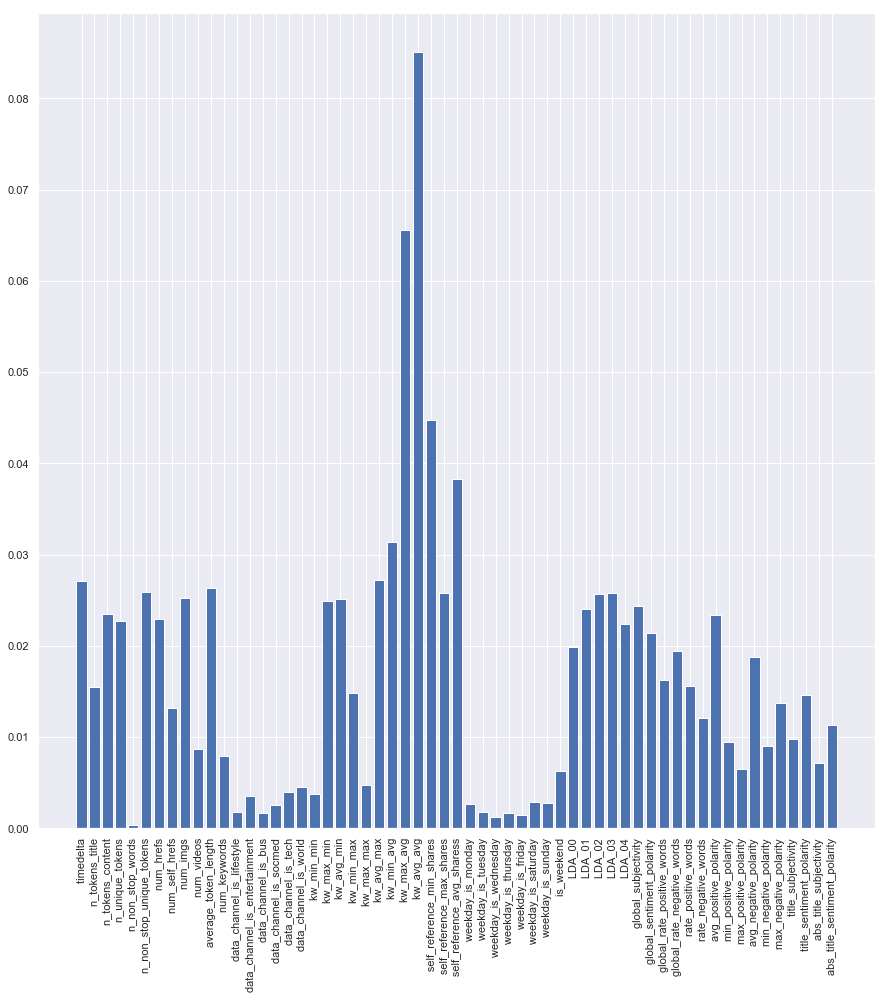

In [59]:
fig=plt.figure(figsize=(15,15))
ax=fig.gca()
plt.bar(x=df.variables,height=df.score)
plt.xticks(rotation=90)
plt.show()

__1(b).   RandomForest.PCA__

In [60]:
pca_final_data=principal_comp[[0,1]]

In [142]:
X_train_pca,X_test_pca,y_train_pca,y_test_pca=train_test_split(pca_final_data,y,test_size=0.2,random_state=23)

In [62]:
param_grid_pca= {'n_estimators':[20,40],
            'max_depth':[10,20],
             'bootstrap':[True,False],             
            }

In [68]:
random_search_pca= RandomizedSearchCV(RandomForestRegressor(),param_distributions=param_grid_pca,
                                  cv=5,scoring='neg_mean_absolute_error',
                                  verbose=1,n_jobs=-1)
randomsearch_result_pca=random_search_pca.fit(X_train_pca,y_train_pca)
best_paramters_pca= randomsearch_result_pca.best_params_

C:\Users\ACER M5\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   52.3s finished


In [1]:
pd.DataFrame(randomsearch_result_pca.cv_results_).sort_values('mean_test_score',ascending=False)

NameError: name 'pd' is not defined

In [ ]:
best_paramters_pca

{'n_estimators': 20, 'max_depth': 10, 'bootstrap': True}

In [63]:
rf_pca=RandomForestRegressor(n_estimators=20,max_depth=10)

In [64]:
scores_1=cross_val_score(rf_pca,X_train_pca,y_train_pca,scoring='neg_mean_absolute_error',cv=10)

In [65]:
absolute_scores_1=-scores_1.mean()

In [66]:

rf_pca.fit(X_train_pca,y_train_pca)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [67]:
y_predict_pca= rf_pca.predict(X_test_pca)
test_score_pca= mean_absolute_error(y_test_pca,y_predict_pca)

In [68]:
pd.DataFrame({'train_mse_score':[absolute_scores_1],
             'test_mse_score':[test_score_pca]},index=['Mean'])

,train_mse_score,test_mse_score
Mean,2037.953528,2076.84722


__1(d). Learning Curves__

In [69]:
X_train.shape[0]

31340

In [206]:
train_sizes=[500,800,1000,1250,2500,5000,10000,12000,16000,18000,20000,22000]

In [73]:
from sklearn.model_selection import learning_curve
train_sizes,train_scores,validation_scores= learning_curve(rf,X=X_train,y=y_train,train_sizes=train_sizes,
                                             cv=3,scoring='neg_mean_absolute_error')

In [74]:
train_scores_mean= -train_scores.mean(axis=1)
validation_scores_mean=-validation_scores.mean(axis=1)

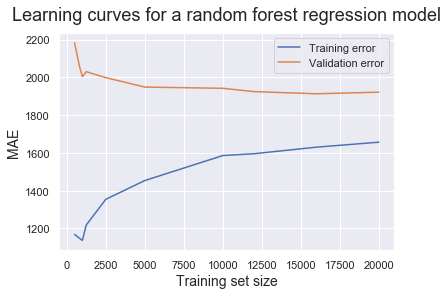

In [75]:
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a random forest regression model', fontsize = 18, y = 1.03)
plt.legend()

In [76]:
train_sizes,train_scores_pca,validation_scores_pca= learning_curve(rf_pca,X=X_train_pca,y=y_train_pca,train_sizes=train_sizes,
                                             cv=3,scoring='neg_mean_absolute_error')

In [77]:
train_scores_mean_pca= -train_scores_pca.mean(axis=1)
validation_scores_mean_pca=-validation_scores_pca.mean(axis=1)

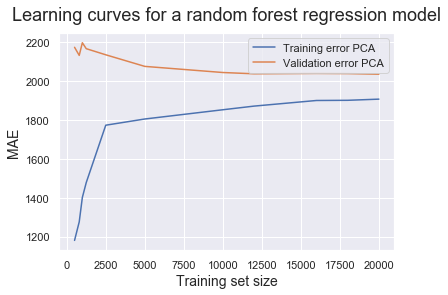

In [78]:
plt.plot(train_sizes, train_scores_mean_pca, label = 'Training error PCA')
plt.plot(train_sizes, validation_scores_mean_pca, label = 'Validation error PCA')
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a random forest regression model', fontsize = 18, y = 1.03)
plt.legend()

One solution at this point is to change to a more complex learning algorithm. This should decrease the bias and increase the variance. A mistake would be to try to increase the number of training instances. Generally, these other two fixes also work when dealing with a high bias and low variance problem:

__1. Training the current learning algorithm on more features (to avoid collecting new data, you can generate easily polynomial features). This should lower the bias by increasing the model’s complexity.__

__2. Decreasing the regularization of the current learning algorithm, if that’s the case. In a nutshell, regularization prevents the algorithm from fitting the training data too well. If we decrease regularization, the model will fit training data better, and, as a consequence, the variance will increase and the bias will decrease.__

### Comparison:

1. PCA Model has less variance but more bias------Solution: Train on more features increasing the complexity of model and decreasing the regularization of model.Meaning allowing it to overfit.



2. Normal Model has less bias (as compared to PCA but more than a random forest should have) and more variance.

#### Since it is a bagging method it has less variance. Now we can use boosting to get less bias.

### 2. Gradient Boosting

In [79]:
from sklearn.ensemble import GradientBoostingRegressor

In [80]:
param_gradboost={'n_estimators':[100,150],
                'max_depth':[5,10],
                'learning_rate':[0.1,0.2]}

In [146]:
pca_data_gbr= principal_comp[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]]
X_train_gbr,X_test_gbr,y_train_gbr,y_test_gbr=train_test_split(pca_data_gbr,y,test_size=0.2,random_state=23)

In [166]:
grad_randomsearch= RandomizedSearchCV(GradientBoostingRegressor(),param_distributions=param_gradboost,cv=3,
                                      scoring='neg_mean_absolute_error',n_jobs=-1,verbose=1)
grad_fit=grad_randomsearch.fit(X_train_gbr,y_train_gbr)
best_param_grad= grad_fit.best_params_

C:\Users\ACER M5\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  3.7min finished


In [167]:
pd.DataFrame(grad_fit.cv_results_)

C:\Users\ACER M5\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\ACER M5\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\ACER M5\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\ACER M5\Anaconda3\lib\site-packages\skle

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,10.391538,0.159412,0.034366,0.001705,50,5,0.1,"{'n_estimators': 50, 'max_depth': 5, 'learning...",-1953.574483,-1919.702584,-1933.616487,-1935.631249,13.901551,1,-1793.111184,-1832.727385,-1797.115640,-1807.651403,17.806601
1,23.423907,1.262259,0.064600,0.002459,100,5,0.1,"{'n_estimators': 100, 'max_depth': 5, 'learnin...",-1958.515310,-1933.623252,-1935.725277,-1942.621500,11.271604,2,-1727.805193,-1763.998618,-1730.969217,-1740.924343,16.367028
2,39.150215,1.202425,0.084578,0.003438,50,10,0.1,"{'n_estimators': 50, 'max_depth': 10, 'learnin...",-1998.116363,-1991.712304,-1992.432999,-1994.087275,2.864215,5,-1276.787587,-1293.015226,-1238.277723,-1269.360179,22.955368
3,68.245814,0.664148,0.153211,0.014157,100,10,0.1,"{'n_estimators': 100, 'max_depth': 10, 'learni...",-2017.486030,-2013.533565,-2016.302244,-2015.773930,1.656288,6,-1062.667879,-1060.950255,-1010.151801,-1044.589978,24.361562
4,11.314473,0.175591,0.033331,0.003287,50,5,0.2,"{'n_estimators': 50, 'max_depth': 5, 'learning...",-1966.894916,-1934.953939,-1949.583048,-1950.477330,13.055379,3,-1728.815051,-1761.732141,-1729.908581,-1740.151924,15.266047
5,20.880142,0.088711,0.057481,0.006018,100,5,0.2,"{'n_estimators': 100, 'max_depth': 5, 'learnin...",-1978.971037,-1959.172080,-1966.068702,-1968.070670,8.206031,4,-1605.017025,-1635.188623,-1611.821480,-1617.342376,12.921340
6,29.466141,0.097441,0.064293,0.004024,50,10,0.2,"{'n_estimators': 50, 'max_depth': 10, 'learnin...",-2047.389663,-2034.432765,-2047.177933,-2042.999987,6.058702,7,-1063.572646,-1070.687852,-1023.308572,-1052.523023,20.860963
7,61.932256,1.003868,0.118062,0.023686,100,10,0.2,"{'n_estimators': 100, 'max_depth': 10, 'learni...",-2086.844568,-2081.312533,-2087.059588,-2085.072167,2.659975,8,-732.813850,-725.721342,-678.909770,-712.481654,23.914842


In [168]:
best_param_grad

{'n_estimators': 50, 'max_depth': 5, 'learning_rate': 0.1}

In [82]:
gbr= GradientBoostingRegressor(n_estimators=50,max_depth=5,learning_rate=0.1)

In [111]:
grad_result= gbr.fit(X_train_gbr,y_train_gbr)

In [112]:
scores_boosting= cross_val_score(gbr,X_train_gbr,y_train_gbr,scoring='neg_mean_absolute_error',cv=5)

In [113]:
absolute_scores_boosting= - scores_boosting.mean()

In [114]:
y_pred_gbr=gbr.predict(X_test_gbr)
test_score_gbr= mean_absolute_error(y_test_gbr,y_pred_gbr)

In [115]:
pd.DataFrame({'train_mae_score':[absolute_scores_boosting],
             'test_mae_score':[test_score_gbr]},index=['Mean'])

,train_mae_score,test_mae_score
Mean,1949.674737,1914.170178


In [88]:
train_sizes,train_scores_gbr,validation_scores_gbr= learning_curve(gbr,X=X_train_pca,y=y_train_pca,train_sizes=train_sizes,
                                             cv=5,scoring='neg_mean_absolute_error')

In [89]:
train_scores_mean_gbr= -train_scores_gbr.mean(axis=1)
validation_scores_mean_gbr=-validation_scores_gbr.mean(axis=1)

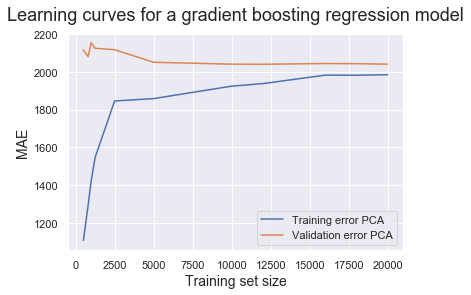

In [90]:
plt.plot(train_sizes, train_scores_mean_gbr, label = 'Training error PCA')
plt.plot(train_sizes, validation_scores_mean_gbr, label = 'Validation error PCA')
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a gradient boosting regression model', fontsize = 18, y = 1.03)
plt.legend()

#### This model has much is better than above two in bias and variance.

### 2(b). Gradient Boosting with feature selection

In [91]:
gbr_original=gbr.fit(X_train,y_train)

In [92]:
df_1=pd.DataFrame(X_train.columns,gbr_original.feature_importances_).reset_index()
df_1.columns=['score','variables']
select_columns=df_1.sort_values('score',ascending=False)['variables']

In [93]:
feature_importance_df= pd.concat(objs=[df,df_1],axis=1)

In [94]:
feature_importance_df.columns=['Variables_rf','Score_rf','score_gb','Variables_gb']
feature_importance_df=feature_importance_df.sort_values('Score_rf',ascending=False).reset_index(drop=True)

In [95]:
np.sum(feature_importance_df['score_gb'][0:25])

0.824101638879305

In [96]:
select_columns=df_1.sort_values('score',ascending=False)['variables'][0:25]

In [147]:
X_train_select,X_test_select,y_train_select,y_test_select=train_test_split(data[select_columns.reset_index()['variables']],
                                                                           y,test_size=0.2,random_state=23)

In [310]:
grad_randomsearch_select= RandomizedSearchCV(GradientBoostingRegressor(),param_distributions=param_gradboost,cv=3,
                                      scoring='neg_mean_absolute_error',n_jobs=-1,verbose=1)
grad_fit_select=grad_randomsearch_select.fit(X_train_select,y_train_select)
best_param_grad_select= grad_fit_select.best_params_

C:\Users\ACER M5\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:271: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  6.9min finished


In [311]:
pd.DataFrame(grad_fit_select.cv_results_)

C:\Users\ACER M5\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\ACER M5\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\ACER M5\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\ACER M5\Anaconda3\lib\site-packages\skle

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_depth,param_learning_rate,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,19.047941,0.086689,0.054301,0.003397,100,5,0.1,"{'n_estimators': 100, 'max_depth': 5, 'learnin...",-1934.203115,-1925.798973,-1904.532398,-1921.512037,12.486483,1,-1691.995499,-1696.511168,-1702.114876,-1696.873848,4.139170
1,28.274928,0.399178,0.076953,0.004897,150,5,0.1,"{'n_estimators': 150, 'max_depth': 5, 'learnin...",-1938.622352,-1930.205699,-1907.501934,-1925.443901,13.143391,2,-1619.766000,-1623.209572,-1632.946122,-1625.307232,5.581460
2,80.606382,2.485719,0.136917,0.002941,100,10,0.1,"{'n_estimators': 100, 'max_depth': 10, 'learni...",-2004.740914,-1990.849785,-1984.489870,-1993.360473,8.455864,5,-888.803935,-913.026622,-853.282537,-885.037698,24.535380
3,117.362422,2.047286,0.195548,0.011079,150,10,0.1,"{'n_estimators': 150, 'max_depth': 10, 'learni...",-2021.486470,-2016.767058,-1999.378927,-2012.544572,9.506370,6,-700.818663,-697.756573,-656.177637,-684.917624,20.360653
4,18.990977,0.034430,0.053967,0.002827,100,5,0.2,"{'n_estimators': 100, 'max_depth': 5, 'learnin...",-1967.161118,-1955.945896,-1934.954307,-1952.687673,13.348606,3,-1558.380162,-1565.879139,-1557.367385,-1560.542229,3.796348
5,28.574410,0.108986,0.078951,0.004896,150,5,0.2,"{'n_estimators': 150, 'max_depth': 5, 'learnin...",-1979.542546,-1978.259107,-1960.651357,-1972.818058,8.618687,4,-1444.921883,-1448.528847,-1438.662620,-1444.037783,4.076096
6,80.812622,1.034967,0.129589,0.003298,100,10,0.2,"{'n_estimators': 100, 'max_depth': 10, 'learni...",-2107.325701,-2087.988263,-2062.444733,-2085.920315,18.380692,7,-530.541414,-528.625799,-530.401616,-529.856276,0.871949
7,114.991559,6.747599,0.205541,0.068827,150,10,0.2,"{'n_estimators': 150, 'max_depth': 10, 'learni...",-2110.394336,-2107.427815,-2091.859446,-2103.227562,8.128813,8,-355.942516,-335.692288,-341.041955,-344.225586,8.568141


In [312]:
best_param_grad_select

{'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}

In [98]:
gbr_select= GradientBoostingRegressor(n_estimators=100,max_depth=5,learning_rate=0.1)

In [99]:
grad_result_select= gbr_select.fit(X_train_select,y_train_select)

In [100]:
scores_boosting_select= cross_val_score(gbr_select,X_train_select,y_train_select,scoring='neg_mean_absolute_error',cv=5)

In [116]:
absolute_scores_boosting_select= - scores_boosting_select.mean()

In [117]:
y_pred_gbr_select=gbr_select.predict(X_test_select)
test_score_gbr_select= mean_absolute_error(y_test_select,y_pred_gbr_select)

In [118]:
pd.DataFrame({'train_mae_score':[absolute_scores_boosting_select],
             'test_mae_score':[test_score_gbr_select]},index=['Mean'])

,train_mae_score,test_mae_score
Mean,1904.625189,1928.210292


In [104]:
train_sizes,train_scores_select,validation_scores_select= learning_curve(gbr_select,X=X_train_select,
                                                                         y=y_train_select,train_sizes=train_sizes,
                                                                           cv=5,scoring='neg_mean_absolute_error')

In [105]:
train_scores_mean_select= -train_scores_select.mean(axis=1)
validation_scores_mean_select=-validation_scores_select.mean(axis=1)

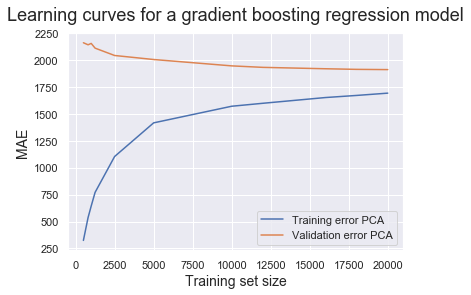

In [106]:
plt.plot(train_sizes, train_scores_mean_select, label = 'Training error PCA')
plt.plot(train_sizes, validation_scores_mean_select, label = 'Validation error PCA')
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a gradient boosting regression model', fontsize = 18, y = 1.03)
plt.legend()

### Comparison of all Scores and Models:

In [120]:
Comparison_df= pd.DataFrame({'Training_Scores':[absolute_scores,absolute_scores_1,
                                                absolute_scores_boosting,absolute_scores_boosting_select],
                            'Test_Scores':[test_score,test_score_pca,test_score_gbr,test_score_gbr_select]},
                            index=['Rf','Rf_PCA','gbr','gbr_select'])

In [124]:
Comparison_df['Variance']=np.subtract(Comparison_df['Training_Scores'],Comparison_df['Test_Scores'])

In [126]:
Comparison_df=Comparison_df.sort_values('Training_Scores')

In [127]:
Comparison_df

,Training_Scores,Test_Scores,Variance
gbr_select,1904.625189,1928.210292,-23.585103
Rf,1914.381553,1939.899119,-25.517567
gbr,1949.674737,1914.170178,35.504559
Rf_PCA,2037.953528,2076.847220,-38.893692


## 3. Stacking

From above comaprison, we are going to create a new dataset through predictions of the four models.

In [157]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,date
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,2013-01-07
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,2013-01-07
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,2013-01-07
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,2013-01-07
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,2013-01-07


In [158]:
X1= rf.predict(pca_data)
X2=rf_pca.predict(pca_final_data)
X3=gbr.predict(pca_data_gbr)
X4=gbr_select.predict(data[select_columns.reset_index()['variables']])

### __To Train the final model on large datasets we had to use whole datasets for prediction here___

In [159]:
data_stacking= pd.DataFrame({'Random_Forest':X1,
                            'Random_Forest_PCA':X2,
                            'GBR':X3,
                            "GBR_select":X4,
                            "Target":y})
data_stacking.head()

,Random_Forest,Random_Forest_PCA,GBR,GBR_select,Target
0,1778.073565,1931.565754,1516.769026,2162.767375,593
1,2045.045026,1557.159367,1513.929414,1896.893246,711
2,1867.140305,1715.601769,1508.811653,2016.660467,1500
3,1791.269581,2074.519611,1516.769026,1802.722422,1200
4,2000.718077,1366.082855,2132.215650,2507.499502,505


In [195]:
from sklearn.linear_model import LinearRegression

In [196]:
X_train_stack,X_test_stack,y_train_stack,y_test_stack= train_test_split(
    data_stacking[['Random_Forest','Random_Forest_PCA','GBR','GBR_select']],y,test_size=0.2)

In [197]:
lr=LinearRegression()
lr.fit(X_train_stack,y_train_stack)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [213]:
training_score_lr= cross_val_score(lr,X_train_stack,y_train_stack,scoring='neg_mean_absolute_error',cv=20)
absolute_training_lr= -training_score_lr.mean()

In [214]:
y_predict_lr= lr.predict(X_test_stack)
test_score_lr= mean_absolute_error(y_test_stack,y_predict_lr)

In [218]:
train_sizes,train_scores_lr,validation_scores_lr= learning_curve(lr,X=X_train_stack,
                                                                         y=y_train_stack,train_sizes=train_sizes,
                                                                           cv=10,scoring='neg_mean_absolute_error')

In [219]:
train_scores_mean_lr= -train_scores_lr.mean(axis=1)
validation_scores_mean_lr=-validation_scores_lr.mean(axis=1)

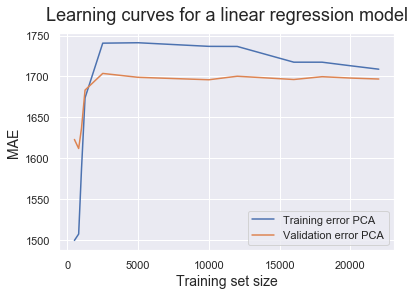

In [220]:
plt.plot(train_sizes, train_scores_mean_lr, label = 'Training error PCA')
plt.plot(train_sizes, validation_scores_mean_lr, label = 'Validation error PCA')
plt.ylabel('MAE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()